
Yulu is a leading micro-mobility service provider in India, offering specialized vehicles for daily commuting needs. Originally created to tackle traffic congestion, Yulu provides a safe commuting solution through a user-friendly mobile app, supporting shared, individual, and eco-friendly commuting options.

Strategically located Yulu zones cover various areas like metro stations, bus stops, offices, residential neighborhoods, and corporate centers, ensuring seamless, cost-effective, and convenient connectivity for short-distance travel.

Recently, Yulu has experienced a significant decline in its revenues. To address this, they have hired a consulting firm to analyze the factors affecting the demand for shared electric cycles in the Indian market.

This project aims to analyze the factors driving the demand for shared electric cycles in India. Specifically, the goal is to identify the key variables that predict demand for these cycles and evaluate how well these variables explain the demand for electric cycles.

The dataset used for this analysis contains relevant information on bike rentals, including factors such as temperature, humidity, weather conditions, user types, and rental counts.

The columns in the dataset are as follows:

1. `datetime`: Timestamp indicating date and time.

2. `season`: Categorized into Spring, Summer, Fall, and Winter.

3. `holiday`: Indicates whether the day is a holiday.

4. `workingday`: Binary indicator for workdays.

5. `weather`: Categorized into Clear, Mist, Light snow/rain, and Heavy rain/snow.

6. `temp`: Temperature in Celsius.

7. `atemp`: "Feels like" temperature in Celsius.

8. `humidity`: Humidity level.

9. `windspeed`: Wind speed.

10. `casual`: Count of casual users renting bikes.

11. `registered`: Count of registered users renting bikes.

12. `count`: Total count of rental bikes, including both casual and registered users.

You can access the dataset [here](https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089).


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import ttest_ind, f_oneway, levene, kruskal, shapiro, chi2_contingency, chi2
from statsmodels.graphics.gofplots import qqplot

# # To reduce the number of warnings, I learned how to suppress them
# import warnings
# warnings.filterwarnings("ignore")


In [7]:
df = pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089")
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


#### Observation
1. The dataframe has 10866 rows and 12 columns(features)
2. Most columns contains numbers
3. Only one column contains object
4. Season', 'holiday', 'workingday', 'weather', 'humidity', 'casual', 'registered', and 'count' are numerical columns.

In [ ]:
# Checking of null values
df.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

All columns have 10886 non-null values, indicating there are no missing values.

There are totally 10886 rows and 12 columns in the data.

The data does not contain any nulls, thus no need of handling the missing data.

In [ ]:
# Uniques values of each columns
df.nunique()

datetime      10886
season            4
holiday           2
workingday        2
weather           4
temp             49
atemp            60
humidity         89
windspeed        28
casual          309
registered      731
count           822
dtype: int64

In [11]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


* Covers rental period: 2011-01-01 to 2012-12-19
* Temperature range: 0.82°C to 41.0°C (average: 20.23°C)
* Humidity range: 0% to 100% (average: 61.88%)
* Windspeed range: 0 mph to 56 mph
* Daily bike rentals: 1 to 977

In [19]:
categorical_cols = [ "workingday", "weather", "season", "holiday"]
continuous_cols = ["temp", "atemp", "humidity", "windspeed", "casual", "registered", "count"]

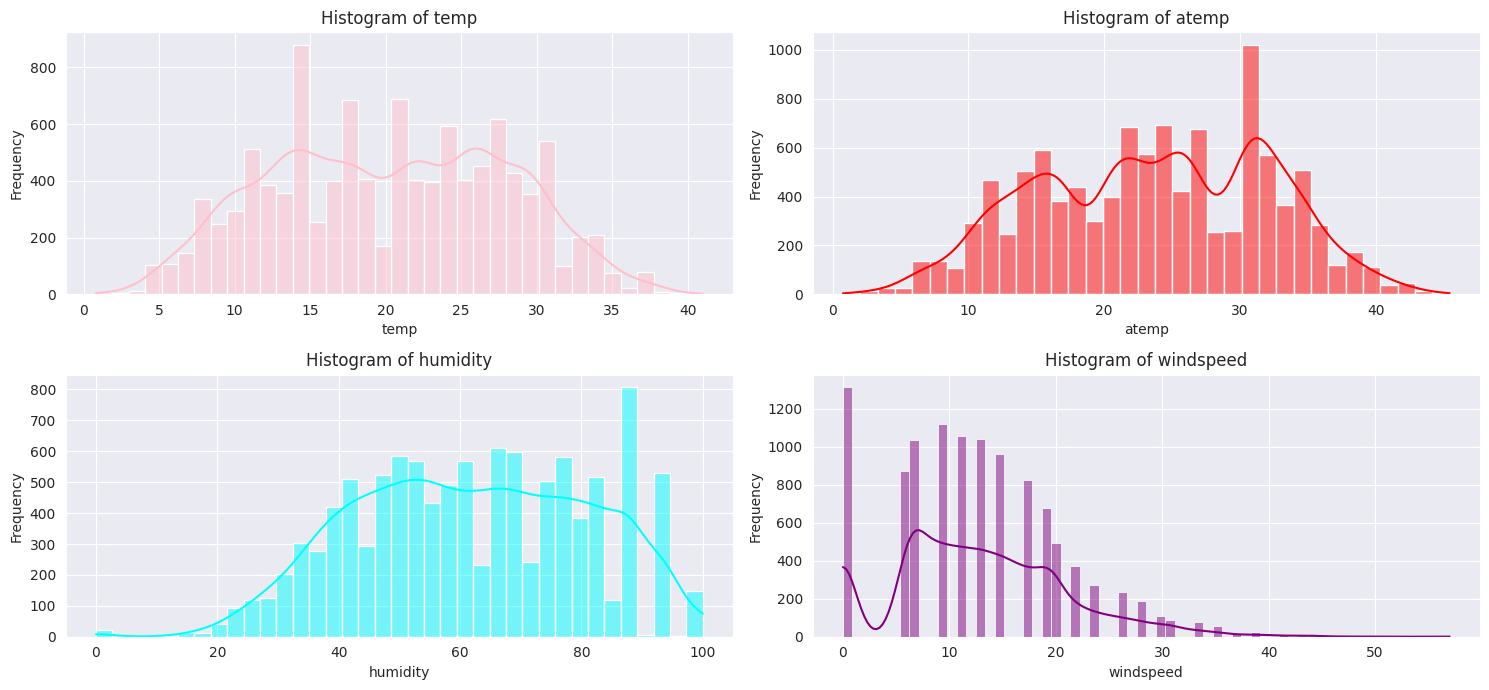

In [16]:
sns.set_style('darkgrid')
color_palette = ['pink', 'red', 'cyan', 'purple']
fig, axs = plt.subplots(2, 2, figsize=(15, 7))

continuous_columns = ['temp', 'atemp', 'humidity', 'windspeed']

for i, col in enumerate(continuous_columns):
    sns.histplot(data=df, x=col, ax=axs.flatten()[i], kde=True, color=color_palette[i])
    axs.flatten()[i].set_ylabel('Frequency')
    axs.flatten()[i].set_title('Histogram of ' + col)

plt.tight_layout()
plt.show()

Analysis of Continuous Variables:

- **Temperature ``temp``:**
  - The temperature distribution seems to have a single peak, resembling either a normal distribution or slightly skewed to the right.
  - The majority of temperatures are between 10°C and 30°C.

- **Perceived Temperature ``atemp``:**
  - The distribution of perceived temperature also shows a single peak and is similar to the actual temperature distribution.
  - Perceived temperature ranges from approximately 5°C to 35°C.

- **Humidity ``humidity``:**
  - Humidity distribution appears to have two peaks, indicating a bimodal distribution.
  - Humidity values vary widely, suggesting significant variability in humidity levels.

- **Wind Speed ``windspeed``:**
  - The wind speed distribution is heavily skewed to the right, indicating the presence of outliers or extreme values.
  - Most wind speed values are concentrated around 20 units or lower, with some instances of higher wind speeds.


In [ ]:
df[continuous_cols].describe()

,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


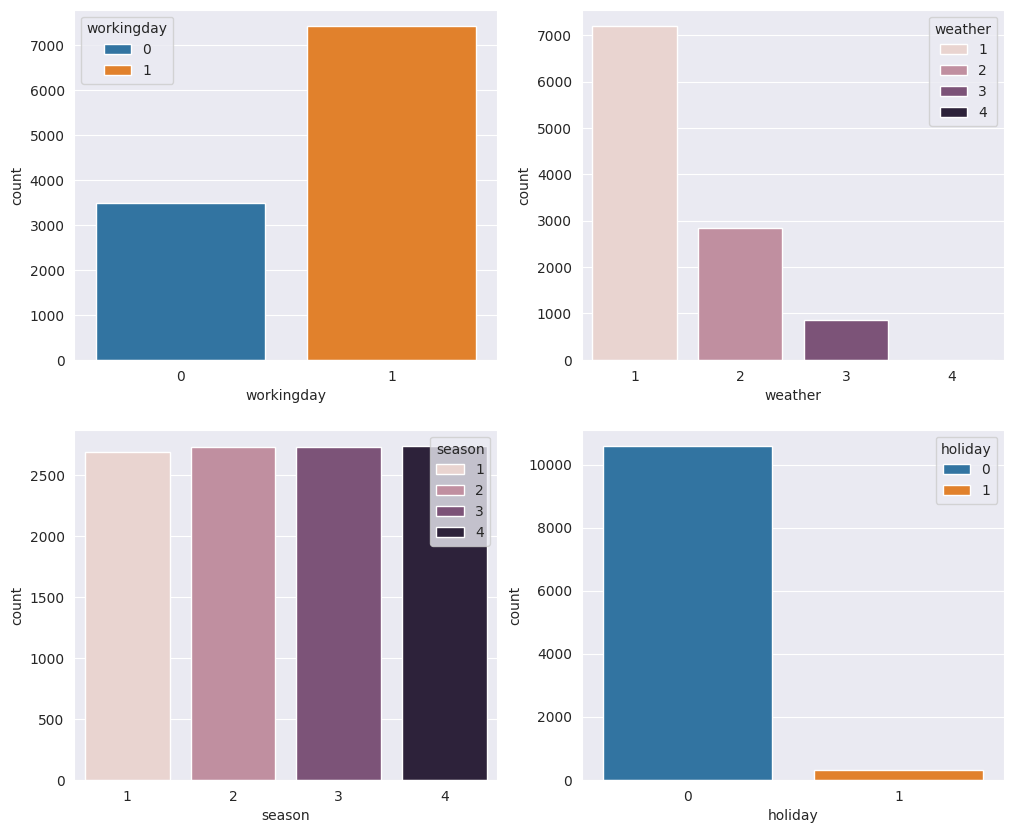

In [21]:
fig, axs = plt.subplots(2,2, figsize=(12,10))
palette = "Set3"
for i, col in enumerate(categorical_cols):
    sns.countplot(data=df, x=col, hue=col, ax=axs[i//2][i%2])
plt.show()




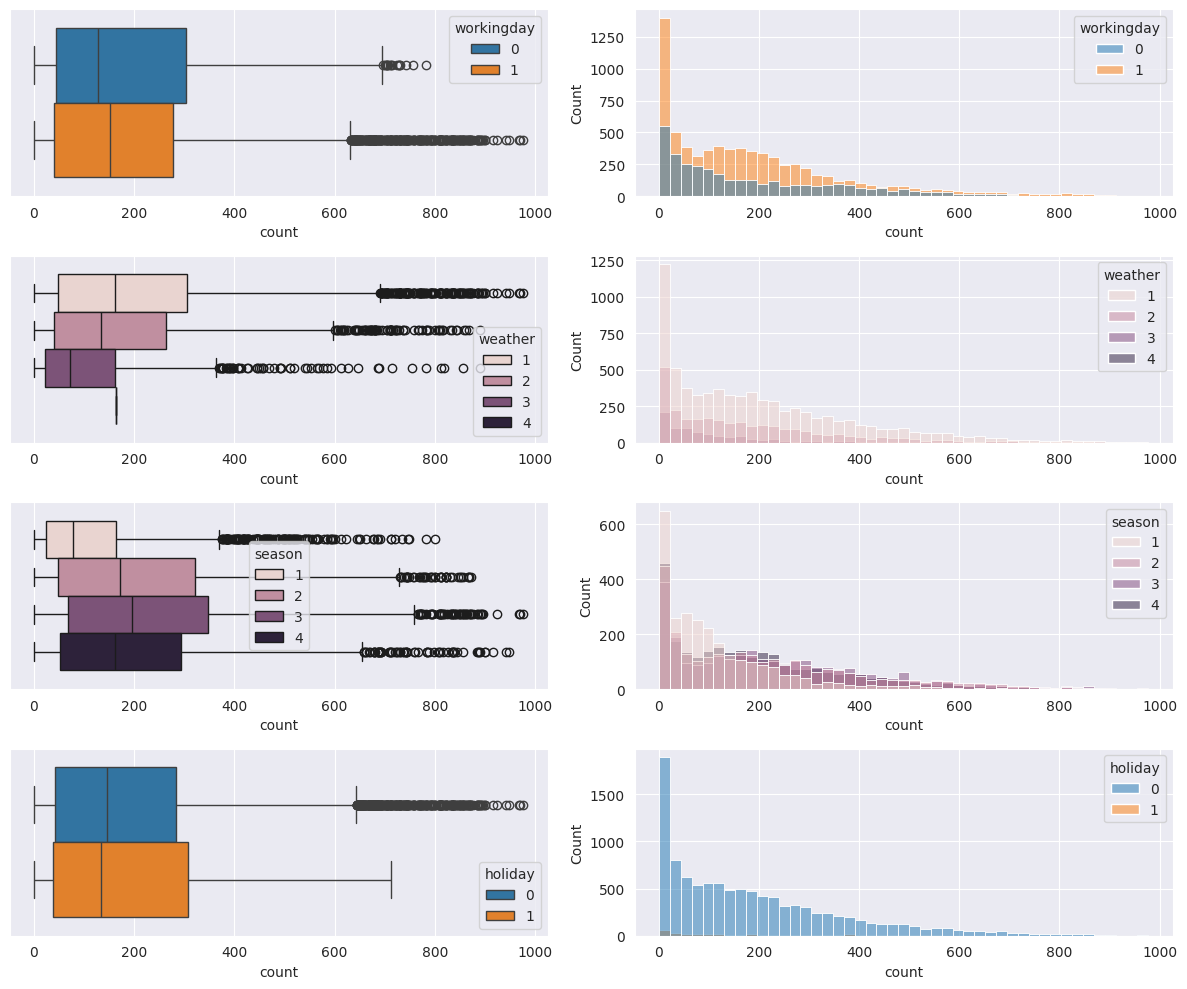

In [23]:
num_rows = 4
num_cols = 2

fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 10))
palette = "Set1"
for i, col in enumerate(categorical_cols):
    sns.boxplot(data=df, x="count", hue=col, ax=axs[i][0])
    sns.histplot(data=df, x="count", hue=col, ax=axs[i][1])

plt.tight_layout()
plt.show()

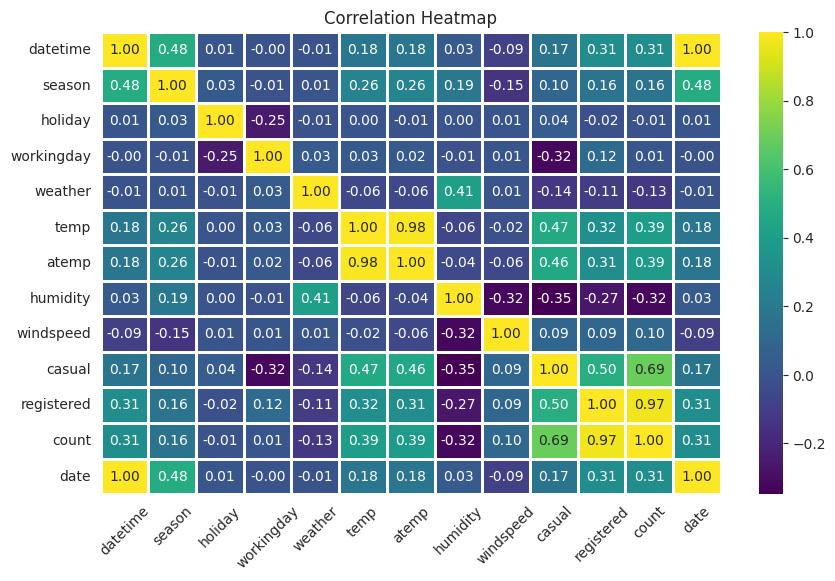

In [25]:
# Convert 'datetime' to datetime format and extract 'date'
df['datetime'] = pd.to_datetime(df['datetime'])
df['date'] = df['datetime'].dt.date.astype('datetime64[ns]')

# Convert specified columns to categorical data types
for col in ['season', 'holiday', 'workingday', 'weather']:
    df[col] = df[col].astype('category')

# Create a correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='viridis', fmt='.2f', linewidths=2)
plt.title('Correlation Heatmap')
plt.xticks(rotation=45)
plt.show()


# Hypothesis Testing

## Problem Statement 1: Investigating the Impact of Working Days on Electric Cycle Rentals




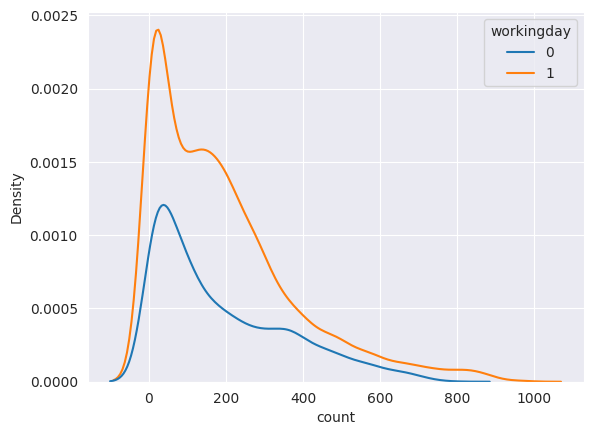

In [ ]:
# graph plot
sns.kdeplot(data = df, x="count", hue="workingday")
plt.show()

Null Hypothesis (H0): There is no effect of Working Day on the number of cycles being rented.

Alternate Hypothesis (H1): Working Day has an effect on the number of cycles being rented.

Significance Level (alpha): 0.05

We will employ a 2-Sample T-Test to examine the hypothesis stated above.

### Assumptions:
1. Random Sampling: We collected 30 random samples from the population data.
2. Independence: The data points are independent of each other.
3. Normality: Due to the Central Limit Theorem (CLT), we can assume that the sample means are normally distributed since our sample size is 30, and we are testing means.
4. Equal Variances: We will proceed with the assumption that the variances are approximately equal.


In [30]:
# random sampling
sample1 = np.random.choice(df[df['workingday'] == 0]['count'].values, 30)
sample2 = np.random.choice(df[df['workingday'] == 1]['count'].values, 30)

In [31]:
# Conducting t-test for independence
t_statistic, p_value = ttest_ind(sample1, sample2, alternative="two-sided")

# Printing the results
print("T-statistic:", t_statistic)
print("P-value:", p_value)


T-statistic: 0.2047859753181637
P-value: 0.8384563166569465


In [33]:
alpha = 0.05

if p_value >= alpha:
    print("Fail to reject null hypothesis. Working Day does not have an effect on the number of electric cycles rented.")
else:
    print("Reject null hypothesis. Working Day has an effect on the number of electric cycles rented.")


Fail to reject null hypothesis. Working Day does not have an effect on the number of electric cycles rented.


### **Conclusion:**

The test results indicate that the status of the day (working day or not) does not have a statistically significant impact on the number of electric cycles rented.

-----

## Problem 2: Check if weathers have signifance on no. of cycles being rented

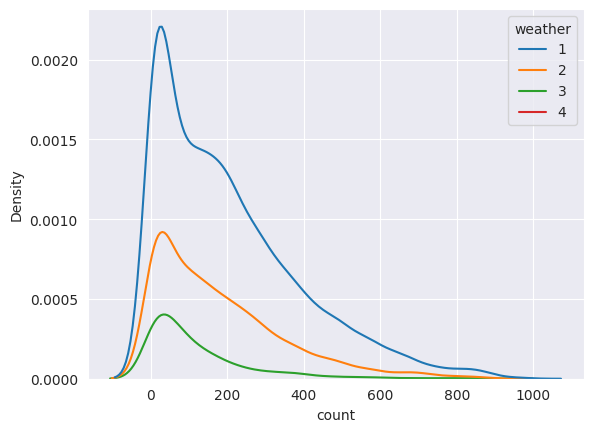

In [34]:
sns.kdeplot(data = df, x="count", hue="weather")

plt.show()

The data doesn't seem to follow a normal distribution but rather resembles an F distribution, as indicated by the graph.

Null Hypothesis (H0): The number of cycles rented is the same across different weather conditions.

Alternate Hypothesis (H1): The number of cycles rented varies across different weather conditions.

In [35]:
data_1 = df[df['weather'] == 1]['count'].values
data_2 = df[df['weather'] == 2]['count'].values
data_3 = df[df['weather'] == 3]['count'].values
data_4 = df[df['weather'] == 4]['count'].values

Assumptions:

1. Independence: The data points are independent of each other.
2. Normality: The normality of the data can be tested using QQ-Plots or the Shapiro-Wilk Test, with a significance level of 0.05.
3. Equal Variances: We will proceed with the assumption that the data has equal variances.

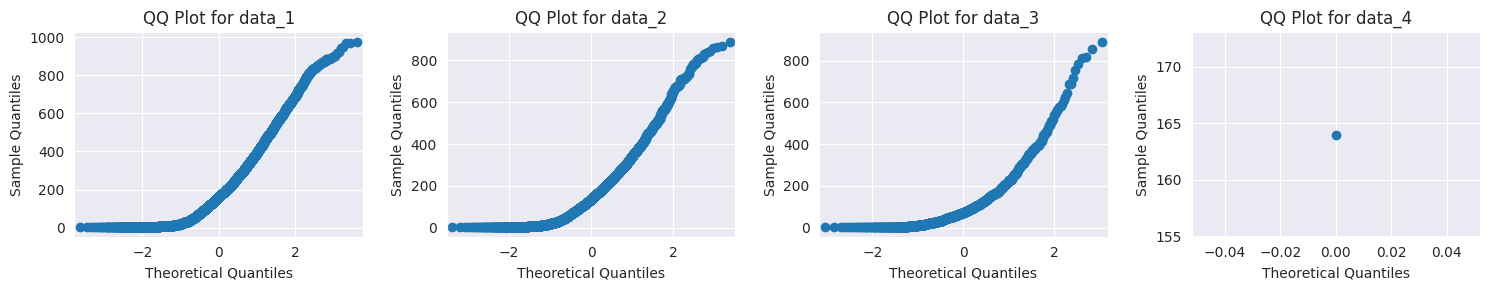

In [36]:
fig, axs = plt.subplots(1, 4, figsize=(15, 3))

for i, data in enumerate([data_1, data_2, data_3, data_4]):
    qqplot(data, ax=axs[i])
    axs[i].set_title(f"QQ Plot for data_{i+1}")

plt.tight_layout()
plt.show()


The graphs suggest that the data may not follow a normal distribution. We will confirm this using the Shapiro-Wilk Test.

In [ ]:
# Dictionary to hold data for different weather types
weather_data = {
    "Weather 1": data_1,
    "Weather 2": data_2,
    "Weather 3": data_3
}

# Perform Shapiro-Wilk test for each weather type
for weather, data in weather_data.items():
    stat, p_value = shapiro(data)
    print(f"Shapiro-Wilk Test for {weather}:")
    print("Test Statistic:", stat)
    print("p-value:", p_value)
    print("Data is normally distributed" if p_value > 0.05 else "Data is not normally distributed")
    print()


Shapiro-Wilk Test for Weather 1:
Test Statistic: 0.8909230828285217
p-value: 0.0
Data is not normally distributed

Shapiro-Wilk Test for Weather 2:
Test Statistic: 0.8767687082290649
p-value: 9.781063280987223e-43
Data is not normally distributed

Shapiro-Wilk Test for Weather 3:
Test Statistic: 0.7674332857131958
p-value: 3.876090133422781e-33
Data is not normally distributed



We have confirmed that the data is not normally distributed. While we will conduct ANOVA, we will also verify our hypothesis using the Kruskal-Wallis test, as it is more suitable when assumptions for ANOVA are not met.

In [37]:
def perform_anova(data_list, alpha=0.05):

    f_statistic, p_value = f_oneway(*data_list)

    print("ANOVA Results:")
    print("F-Statistic:", f_statistic)
    print("P-value:", p_value)

    if p_value < alpha:
        print("\nReject the null hypothesis.")
        print("There is evidence that the number of cycles rented varies across different weathers.")
    else:
        print("\nFail to reject null hypothesis.")
        print("There is no significant evidence that the number of cycles rented varies across different weathers.")

# Call the function with the list of data
perform_anova([data_1, data_2, data_3, data_4])


ANOVA Results:
F-Statistic: 65.53024112793271
P-value: 5.482069475935669e-42

Reject the null hypothesis.
There is evidence that the number of cycles rented varies across different weathers.


In [38]:
def perform_kruskal(data_list, alpha=0.05):

    # Perform Kruskal-Wallis test
    kruskal_stat, p_value = kruskal(*data_list)

    # Print results
    print("Kruskal-Wallis Results:")
    print("Kruskal-Statistic:", kruskal_stat)
    print("P-value:", p_value)

    # Interpret results
    if p_value < alpha:
        print("\nReject the null hypothesis.")
        print("The number of cycles rented is different in different weathers according to Kruskal-Wallis.")
    else:
        print("\nFail to reject null hypothesis.")
        print("The number of cycles rented is similar in different weathers according to Kruskal-Wallis.")

# Call the function with the list of data
perform_kruskal([data_1, data_2, data_3, data_4])

Kruskal-Wallis Results:
Kruskal-Statistic: 205.00216514479087
P-value: 3.501611300708679e-44

Reject the null hypothesis.
The number of cycles rented is different in different weathers according to Kruskal-Wallis.


### Conclusion

The weather significantly affects the number of cycles being rented. The number of cycles rented varies across different weather conditions.
----

## Problem Statement 3: Analyzing the Impact of Season on the Number of Cycles Rented
---



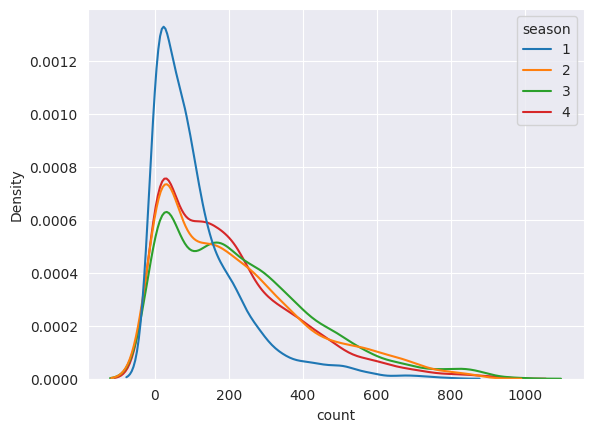

In [39]:
data = pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089")
sns.kdeplot(data = df, x="count", hue="season")
plt.show()

Observation: The data appears to deviate from a normal distribution.

Null Hypothesis (H0): The number of cycles rented is the same across different seasons.

Alternate Hypothesis (H1): The number of cycles rented varies across different seasons.

In [40]:
data_1 = df[df['season'] == 1]['count'].values
data_2 = df[df['season'] == 2]['count'].values
data_3 = df[df['season'] == 3]['count'].values
data_4 = df[df['season'] == 4]['count'].values

Assumptions:

1. Independence: The data points are independent of each other.
2. Normality: The normality of the data can be tested using QQ-Plots or the Shapiro-Wilk Test, with a significance level of 0.05.
3. Equal Variances: We will proceed with the assumption that the data has equal variances.

Test for normality

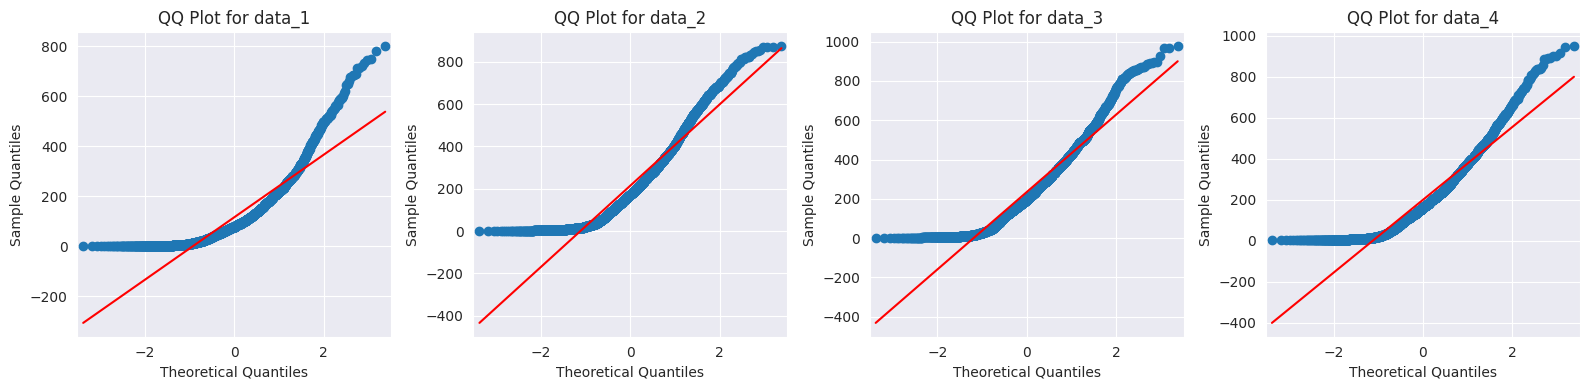

In [41]:
# Normality test using QQ plots
fig, axs = plt.subplots(1, 4, figsize=(16, 4))

qqplot(data_1, line='s', ax=axs[0])
axs[0].set_title('QQ Plot for data_1')

qqplot(data_2, line='s', ax=axs[1])
axs[1].set_title('QQ Plot for data_2')

qqplot(data_3, line='s', ax=axs[2])
axs[2].set_title('QQ Plot for data_3')

qqplot(data_4, line='s', ax=axs[3])
axs[3].set_title('QQ Plot for data_4')

plt.tight_layout()
plt.show()


The graphs suggest that the data may not follow a normal distribution. We will confirm this using the Shapiro-Wilk Test.

In [43]:
data_list = [data_1, data_2, data_3, data_4]
seasons = ["Season 1", "Season 2", "Season 3", "Season 4"]

for season, data in zip(seasons, data_list):
    stats, p_value = shapiro(data)
    print(f"Shapiro-Wilk Test for {season}:")
    print("Test Statistic:", stats)
    print("p-value:", p_value)
    print("Data is normally distributed" if p_value > 0.05 else "Data is not normally distributed")
    print()

Shapiro-Wilk Test for Season 1:
Test Statistic: 0.8087388873100281
p-value: 0.0
Data is not normally distributed

Shapiro-Wilk Test for Season 2:
Test Statistic: 0.900481641292572
p-value: 6.039093315091269e-39
Data is not normally distributed

Shapiro-Wilk Test for Season 3:
Test Statistic: 0.9148160815238953
p-value: 1.043458045587339e-36
Data is not normally distributed

Shapiro-Wilk Test for Season 4:
Test Statistic: 0.8954644799232483
p-value: 1.1301682309549298e-39
Data is not normally distributed



 The Shapiro-Wilk test confirms that the data is not normally distributed. While we will initially use ANOVA, we will also validate our results using the Kruskal-Wallis test, which is more suitable when ANOVA assumptions are not met.

In [44]:
def perform_anova(*args, alpha=0.05):
    f_statistic, p_value = f_oneway(*args)
    print("F-Statistic:", f_statistic)
    print("P-value:", p_value)

    if p_value < alpha:
        print("\nReject the null hypothesis.")
        print("The number of cycles rented varies across different seasons.")
    else:
        print("\nFail to reject null hypothesis.")
        print("The number of cycles rented is similar in different seasons.")

perform_anova(data_1, data_2, data_3, data_4)


F-Statistic: 236.94671081032106
P-value: 6.164843386499654e-149

Reject the null hypothesis.
The number of cycles rented varies across different seasons.


In [ ]:
def perform_kruskal(*args, alpha=0.05):
    kruskal_stat, p_value = kruskal(*args)
    print("Kruskal-Statistic:", kruskal_stat)
    print("P-value:", p_value)

    if p_value < alpha:
        print("\nReject the null hypothesis.")
        print("Number of cycles rented is different in different seasons.")
    else:
        print("\nFail to reject null hypothesis.")
        print("Number of cycles rented is similar in different seasons.")

perform_kruskal(data_1, data_2, data_3, data_4)

Kruskal-Statistic: 699.6668548181988
P-value: 2.479008372608633e-151

Reject the null hypothesis.
Number of cycles rented is different in different seasons.


### Conclusion

The season significantly affects the number of cycles being rented!



## Problem 4: Check if Weather is dependent on the season





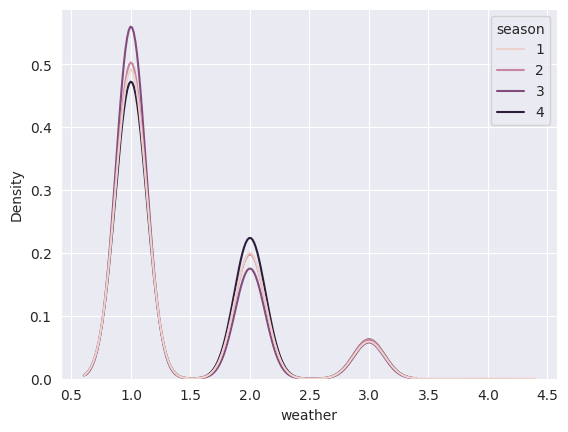

In [48]:
# Visual
data = pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089")
sns.kdeplot(data = data, x="weather", hue="season")
plt.show()

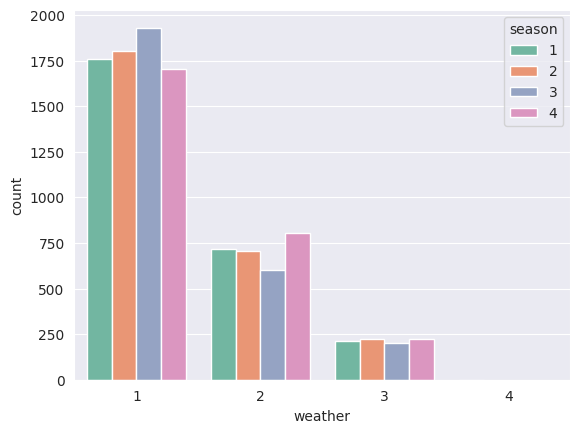

In [49]:
sns.countplot(data=df, x="weather", hue="season", palette="Set2")
plt.show()


In [ ]:
data_table = pd.crosstab(data['season'], data['weather'])
data_table

weather,1,2,3,4
season,,,,
1,1759,715,211,1
2,1801,708,224,0
3,1930,604,199,0
4,1702,807,225,0


Here are your hypotheses and the significance level stated in a paraphrased form:

Null Hypothesis (H0): Weather is independent of the season.

Alternate Hypothesis (H1): Weather is not independent of the season.

Significance level (alpha): 0.05

You intend to use the chi-square test to assess these hypotheses.

Assumptions:
1. Random Sampling: Not applicable as we have the entire population data.
2. Independence: The data points are independent of each other.
3. Large Enough Sample Size: For weather type 4, we do not have a sufficiently large amount of data.

In [50]:
def chi_square_test(data, variable1, variable2, alpha=0.05):
    data_table = pd.crosstab(data[variable1], data[variable2])

    val = chi2_contingency(data_table)
    expected_values = val[3]

    nrows, ncols = data_table.shape
    dof = (nrows - 1) * (ncols - 1)

    chi_sqr_statistic = sum((data_table.values.flatten() - expected_values.flatten())**2 / expected_values.flatten())

    critical_val = chi2.ppf(q=1 - alpha, df=dof)

    p_val = 1 - chi2.cdf(x=chi_sqr_statistic, df=dof)

    if p_val <= alpha:
        print(f"\nWith a p-value less than the specified alpha of {alpha}, \nWe reject the Null Hypothesis. \nThis implies that {variable2} is dependent on {variable1}.")
    else:
        print(f"\nWith a p-value greater than the specified alpha of {alpha}, \nWe do not reject the Null Hypothesis.")


In [51]:
chi_square_test(data, 'season', 'weather')


With a p-value less than the specified alpha of 0.05, 
We reject the Null Hypothesis. 
This implies that weather is dependent on season.
